In [1]:
import numpy as np
import pandas as pd
import tensorflow


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xml.etree.ElementTree as ET
import sklearn
import itertools
#import cv2
import scipy
import os
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

(-0.5, 359.5, 362.5, -0.5)

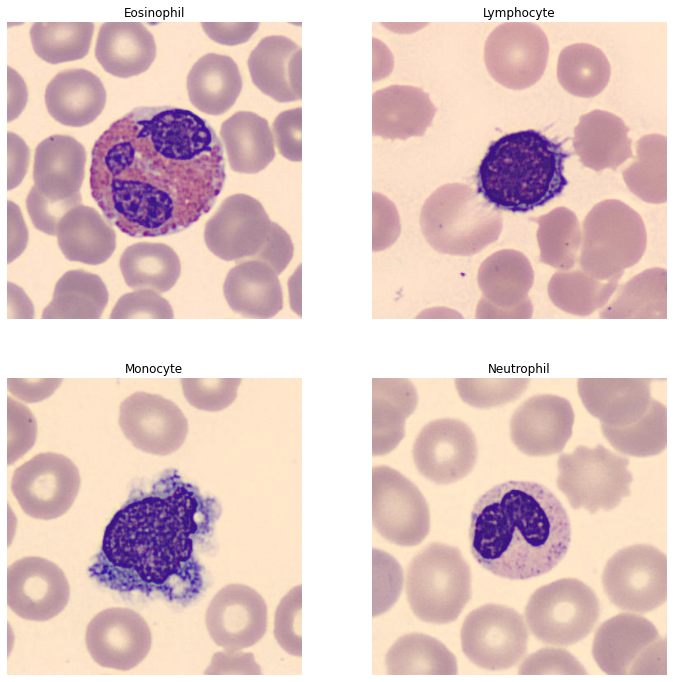

In [2]:
# Plot Image
#


plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
img = plt.imread("C:/Users/laleh/Documents/Ml_logiciel/Datascientest/Data_Mendely/Eosinophil/EO_27.jpg") #df.loc[i,"path"])
plt.imshow(img)
plt.title('Eosinophil')
plt.axis('off')


plt.subplot(222) 
img = plt.imread("C:/Users/laleh/Documents/Ml_logiciel/Datascientest/Data_Mendely/lymphocyte/LY_3530.jpg")
plt.imshow(img)
plt.title('Lymphocyte')
plt.axis('off')

plt.subplot(223)
img = plt.imread("C:/Users/laleh/Documents/Ml_logiciel/Datascientest/Data_Mendely/monocyte/MO_1524.jpg")
plt.imshow(img)
plt.title('Monocyte')
plt.axis('off') 


plt.subplot(224)
img=plt.imread("C:/Users/laleh/Documents/Ml_logiciel/Datascientest/Data_Mendely/neutrophil/BNE_715.jpg")
plt.imshow(img)
plt.title('Neutrophil')
plt.axis('off') 



neutrophil      3329
eosinophil      3117
ig              2895
platelet        2348
erythroblast    1551
monocyte        1420
basophil        1218
lymphocyte      1214
Name: label, dtype: int64


<AxesSubplot:>

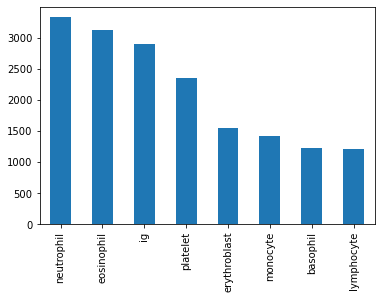

In [3]:
filename = 'C:/Users/laleh/Documents/Pythons/projet_blood/tests_images/data_1.pkl'
df= pickle.load(open(filename, 'rb'))
print(df.label.value_counts())
df.label.value_counts().plot.bar()
#i = np.random.randint(0,len(df))

In [4]:
data_train, data_test = train_test_split(df, test_size=0.2, random_state=123)

In [5]:
%matplotlib inline
import numpy as np # For the handling of paintings
import matplotlib.pyplot as plt # For displaying images
from matplotlib import cm # To import new color cards

from sklearn.model_selection import train_test_split # To distribute the data
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras.applications.vgg16 import preprocess_input
# Insert your code here

train_data_generator=ImageDataGenerator(
preprocessing_function=preprocess_input,
    rotation_range=10,
 width_shift_range=0.1,
height_shift_range=0.1,
zoom_range=1.1,
horizontal_flip=True)

test_data_generator=ImageDataGenerator(preprocessing_function=preprocess_input)
#print(df.path[0])
batch_size = 32

data_train['out']=data_train.label.replace(["neutrophil","eosinophil","ig","platelet","erythroblast",
                            "monocyte","basophil","lymphocyte"],[0,1,2,3,4,5,6,7])
data_train['out']=data_train['out'].astype(str)
train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "path",
                                                           y_col='out',
                                                           class_mode ="sparse",
                                                          target_size = (224 , 224), 
                                                          batch_size = batch_size)
data_test['out']=data_test.label.replace(["neutrophil","eosinophil","ig","platelet","erythroblast",
                            "monocyte","basophil","lymphocyte"],[0,1,2,3,4,5,6,7])
data_test['out']=data_test['out'].astype(str)
test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "path",
                                                           y_col='out',
                                                           class_mode ="sparse",
                                                          target_size = (224 , 224), 
                                                          batch_size = batch_size)

<ipython-input-5-4c0395b45c9a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['out']=data_train.label.replace(["neutrophil","eosinophil","ig","platelet","erythroblast",
<ipython-input-5-4c0395b45c9a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['out']=data_train['out'].astype(str)


Found 13673 validated image filenames belonging to 8 classes.


<ipython-input-5-4c0395b45c9a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['out']=data_test.label.replace(["neutrophil","eosinophil","ig","platelet","erythroblast",
<ipython-input-5-4c0395b45c9a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['out']=data_test['out'].astype(str)


Found 3419 validated image filenames belonging to 8 classes.


# Model 1

In [6]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import backend as K
#import tensorflow.keras.engine




from tensorflow.keras.applications.vgg16 import VGG16

n_class=8



base_model=VGG16(weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable=False
    
    
    
model=Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(n_class, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [21]:
history = model.fit_generator(generator=train_generator, 
                                epochs = 1,
                                steps_per_epoch = len(data_train)//batch_size,
                                validation_data = test_generator,
                                validation_steps = len(data_test)//batch_size
                                )

427/427 [==============================] - 2173s 5s/step - loss: 1.5148 - acc: 0.4326 - val_loss: 1.0936 - val_acc: 0.5554


# Model 2

In [7]:
for layer in base_model.layers[-4:]:
    layer.trainable = True


In [23]:
model.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(generator=train_generator, 
                                epochs = 1,
                                steps_per_epoch = len(data_train)//batch_size,
                                validation_data=test_generator,
                                validation_steps=len(data_test)//batch_size
                                )

427/427 [==============================] - 2106s 5s/step - loss: 0.7488 - accuracy: 0.7364 - val_loss: 0.2398 - val_accuracy: 0.9139


# Model 3

In [24]:

from PIL import Image

def convert_image(X):
    X_img=[]
    for image in X:
        
        
             with Image.open(image) as im:

    
                    img = im.resize((224, 224))
                 
                    
                    a = np.asarray(img)
                    X_img.append(a) 
                    
                    
    return np.array(X_img)

# Load the images train
X_train_img= convert_image(data_train.path)
Y_train = data_train['out']

# Load the images test
X_test_img = convert_image(data_test.path)
Y_test = data_test['out']



In [25]:
print(Y_test.shape)
print(data_test.shape)

(3419,)
(3419, 7)


In [22]:
print(model)
from sklearn.svm import SVC
intermediate_layer_model = Model( inputs=model.input, outputs=model.layers[2].output)
X_train_features = intermediate_layer_model.predict(preprocess_input(X_train_img))
X_test_features = intermediate_layer_model.predict(preprocess_input(X_test_img))

svm = SVC(C=100)
svm.fit(X_train_features, data_train["out"])# .values[Y_tr].astype(float))

print(svm.score(X_test_features,data_test["out"])) #.values[Y_te].astype(float)))


0.8502486107048844
